## Support Vector Machines - SVM
Jednym z podstawowych klasyfikatorów jest maszyna wektorów nosnych (ang. *Support Vector Machines - SVM*). U podstaw tego algorytmu leży jedno podstawowe założenie. W pewnej wielowymiarowej przestrzeni (zbiór zmiennych objasniających) istnieje płaszczyzna, która separuje klasyfikowane grupy. Płaszczyzna ta zrobi to w sposób optymalny jeżeli odległość od tej płaszczyzny do najbliższych punktów w poszczególnych klasach będzie maksymalna.

Parafrazując chcemy rozdzielić grupy (klasy) linią (hiperpłaszcyzną) w taki sposób aby przebiegała możliwie po środku przestrzeni rozdzielającej klasy. Zastanówmy się co to znaczy w "możliwi najlepszy sposób". Spójrzmy na poniższy obraz.

<img src="img/svm_MA.png">
Źródło: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Na pierwszy rzut oka widać, że lewa linia dzieli "gorzej". Ponieważ niektóre elementy są bardzo blisko linii dzielącej klasy, to czujemy że przy odrobinie innej realizacji zmiennych losowych doszło by do błędu klasyfikacji.

<img src="img/svm_MB.png">
Źródło: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Sójrzmy jak ten problem optymalizacyjny wygląda formalnie dla liniowych przestrzeni. Chcemy znaleźć taki wektor $\beta$, żeby maksymalizować odległość od najbliższych obserwacji.

$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq 1$$

Zwróćmy uwagę na fakt, że w naszym ograniczeniu pojawia się nierówność. To właśnie ten element powoduje, że patrzymy tylko na "najbliższe obserwacje". Kiedy obserwacja jest dobrze sklasyfikowana i daleko od płaszczyzny ograniczającej przestajemy brać ją pod uwagę. Poniższy wykres pokazuje, że nawet w liniowych przestrzeniach może się zdarzyć, że będziemy musieli wiżąć pod uwagę więcej niż jeden element.

<img src="img/svm_hyper_log.png">
Źródło: Elements of Statistical learning. Dodatkowo na powyższym wykresie widać dwie linie. Czerwoną (SVM) i niebieską (regresja logistyczna). W przypadku powyższego probemu róznica jest niewielka.


### Brak pełnej separacji
W większości przypadków osiągnięcie pełnej separacji pomiędzy grupami jest zwykle niemożliwe. Możemy wtedy policzyć jak bardzo dana obserwacja "przekracza" hiperpłaszczyznę (w jakiej jest odległości) po złej stronie ($\xi_i$). To spowoduje, że nasz problem możemy sformułować w następujący sposób:
$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq 1-\xi_i$$

Powyzsze równania doskonale ilustruje poniższa grafika:
<img src="img/svm_nonsep.png">
Source: Elements of Statistical learning

### Kara za błędy
Dla wygody możemy wprowadzić parametr C, który będzie określał siłę z jaką chcemy karać algorytm za popełniane błędy.
$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2 + C\sum_{i=0}^{N}\xi_i$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq 1-\xi_i$$

Wpływ różnicy parametru C w problemie z separowalnymi klasami:
<img src="img/svm_DiffC.png">
Źródło: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html / Własne. Kod do generowania na końcu notebooka.

Wpływ różnicy parametru C w problemie nieseparowalnymi klasami:
<img src="img/svm_DiffC1.png">
Źródło: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html / Własne. Kod do generowania na końcu notebooka.

### Wektory nośne
W przypadku w pełni separowalnym, te obserwacja na podstawie ktorych wyznaczona zostanie przestrzeń rozdzielająca klasy to właśnie wektory nośne. Każda obserwacja może być wielowymiarowa, stanowi więc wektor. W oparciu o te wektory "opieramy" przestrzeń rozdzielającą, stąd nazwa wektory nośne. 

### NIeliniowość
Doświadczenia pokazują, że ograniczanie się do liniowych zależności pomiędzy zmiennymi zwykle nie pozwala na uzyskanie optymalnych rezultatów.

<img src="img/svm_ME.png">
Źródło: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Jednym z możliwych rozwiązań jest samodzielne przetransformowanie zmiennych, np w postaci wielomianowej. Naszą zależność, np $(x+y)^2$. W przypadku sytuacji przedstawionej na powyższym wykrsie pozwoli to na osiągnięcie doskonałych rezultatów.
<img src="img/svm_MF.gif">
<img src="img/svm_MG.png">
Źródło: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Zwykle nie chcemy jednak polegać na ręcznych transformacjach danych. Jest to z jednej strony czasochłonne, a z drugiej łatwo popełnić trudne do wykrycia błędy.

Inne przykłady transformacji:
<img src="img/svm_mapping1.png" width="40%"><img src="img/svm_mapping2.png" width="40%"><img src="img/svm_mapping3.jpg" width="40%">

### Kernels
Specyfikacja SVM pozwala na łatwą rekonfigurację problemu optymalizacyjnego, która pozwala na uchwycenie nieliniowych zależności pomiedzy zmiennymi. Zamiast $x_i$ możemy wykorzystać dowolną transformację $h(x_i)$. Dla problemu nie ma znaczenia ile posiadamy zmiennych, zgadzać z wektorem $y_i$ musi się tylko liczba argumentów.
$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2 + C\sum_{i=0}^{N}\xi_i$$
$$\text{s.t. } y_i h(x_i)\geq 1-\xi_i$$
Dla którego rozwiązaniem jest:
$$\hat \beta = \sum_{i=0}^{N}\hat\alpha y_i x_i$$
$$f(x) = h(x)^T\beta+\beta_0 = \sum_{i=0}^{N}\alpha y_i \left \langle h(x),h(x_i) \right \rangle + \beta_0$$
tylko dla tych $i$, które nie są wystarczająco dobrze sklasyfikowane.

Funkcja $h(x)$ może być dość dowolna. Będziemy mówili wtedy o kernelach (https://en.wikipedia.org/wiki/Kernel_method) K.
$$K(x, x') =  \left \langle h(x),h(x') \right \rangle$$

Najczęściej spotykamy jednak kernele wielomianowe i radialne 
Wielomianowy
$$K(x, x') = (1 + \left \langle h(x),h(x') \right \rangle)^d$$
Radialny (RBF - radial Basis Function)
$$K(x, x') = \exp(−\gamma \left \| x-x' \right \|^2 )$$

Kernele służą zwiększaniu wymiarowości dzielonej przestrzeni w sposób, który uwzględnie interakcje pomiędzy wymiarami. Dzięki temu zabiegowi często przestrzeń reprezentowana w większej liczbie wymiarów staje się liniowo separowalna lub lepiej separowalna. Właśnie z tego powodu metoda ta jest często wykorzystywana w algorytmie SVM.



### SVM - rozszerzenia
W swoim podstawowej wersji SVM jest metodą przeznaczoną do klasyfikacji binarnej. W praktyce możliwe jest jej rozszerzenie do klasyfikacji wielomianowej a nawet regresji. Wykorzystywanie metod klasyfikacji binarnej do klasyfikacji wielomianowej to uniwersalna technika, która nie ogranicza się tylko do SVM. Zwykle przeprowadza się ją na jeden z dwóch sposobów:
* One vs All (OvA) znany również jako One vs Rest (OvR). W tym przypadku dla $K$ klass przeprowadzamy $K$ klasyfikacji zakładając, że jedna klasa stanowi "1", a wszystkim pozostałym klasom przypisywane jest "0". Następnie kiedy konieczna jest prognoza dla nowej obserwacji dokonuje się $K$ predykcji. W wyniku tej procedury może dojść do "remisu", dwa klasyfikatory mogą prognozować przynależność do danej klasy. W tym przypadku można dokonać rozstrzygnięcia na podstawie prawdopodobieństw lub w ostateczności losowania.
* One vs One (OvO) W tym przypadku tworzonych jest $K(K-2)/2$ klasyfikatorów. Kazdy z nich trenowany jest wyłącznie na obserwacjach pochodzacych z dóch wybranych klas. Predyckji dokonuje się na podstawie "głosowania" każdego z klasyfikatorów. Również w tym przypadku może dojść do remisu.

### SVM - praktyka
Zalety:
* działa najlepiej w przypadku gdy grupy są w pełni lub w dużej mierze separowalne
* może dobrze działać w sytuacji w której mamy dużą liczbę zmiennych objasniających przy relatywnie niewielkiej liczbie obserwacji
* mozna dopasować algorytm do prób niezbalansowanych
* mała liczba parametrów do optymalizacji algorytmu
* w większości przypadków odporny na nadmierne dopasowanie
* Metoda jest częściowo odporna na występowanie obserwacji odstających (znaczna część obserwacji odstających nie jest w ogóle brana pod uwagę).

Wady:
* Algorytm optymalizuej bardzo powoli na dużych zbiorach danych (duża liczb aobserwacji).
* Nie należy do najskuteczniejszych algorytmów w sytuacji w której separacja pomiędzy klasami jest niska.
* Nie pozwala na bezpośrednią interpretację parametrów.

## SMV - ćwiczenia
Spójrzmy na porównanie wyników naszego modelu logitowego z możliwościami SVM.

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

import gc

Rozpocznijmy od banchmarku w postaci modelu logitowego dla zboru medical.

In [2]:
medical = pd.read_pickle("datasets/medical.p")

In [5]:
medical

UMARSTAT UCUREMP  UCURNINS  USATMED  URELATE  \
0                      Never married      No         0        4        2   
1                          Separated     Yes         1        4        2   
2              Married_live together      No         1        4        5   
3                           Divorced      No         0        1        4   
4                      Never married     Yes         1        4        0   
5                      Never married      No         0        3        1   
6                      Never married     Yes         1        3        0   
7                      Never married      No         1        4        1   
8                      Never married     Yes         1        4        0   
9                        Partnership      No         0        4        0   
10                         Separated     Yes         1        1        0   
11                          Divorced     Yes         1        3        0   
12             Married_live together      No         0        1        5   
13                     Never married      No         0        3        5   
14     Married, do not live together      No         1        3        3   
15                     Never married      No         1        3        3   
16                     Never married      No         1        1        0   
17                     Never married     Yes         1        3        1   
18                     Never married     Yes         1        4        1   
19                       Partnership      No         0        4        5   
20                         Separated      No         0        2        0   
21                          Divorced     Yes         1        3        0   
22                          Divorced      No         1        4        2   
23                     Never married      No         0        1        0   
24                     Never married      No         1        4        4   
25                     Never married      No         1        4        1   
26                     Never married     Yes         1        1        0   
27                     Never married      No         0        3        2   
28                           Widowed      No         1        4        0   
29                     Never married     Yes         1        3        0   
...                              ...     ...       ...      ...      ...   
35042          Married_live together     Yes         1        3        2   
35043          Married_live together     Yes         1        4        2   
35044                  Never married      No         0        2        5   
35045          Married_live together     Yes         1        4        5   
35046                  Never married      No         1        4        1   
35047          Married_live together     Yes         1        4        2   
35048          Married_live together     Yes         1        1        5   
35049          Married_live together     Yes         1        4        1   
35050          Married_live together     Yes         1        4        1   
35051                  Never married     Yes         1        4        0   
35052          Married_live together     Yes         1        4        3   
35053          Married_live together      No         0        4        3   
35054                    Partnership     Yes         1        3        1   
35055                      Separated     Yes         1        4        1   
35056          Married_live together     Yes         1        4        3   
35057          Married_live together      No         1        3        2   
35058                  Never married     Yes         1        3        1   
35059          Married_live together     Yes         1        4        3   
35060          Married_live together     Yes         1        1        3   
35061          Married_live together     Yes         1        4        5   
35062          Married_live together     Yes         1        3        3   


In [3]:
import statsmodels.api as sm
mod = sm.GLM.from_formula(formula="UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + UEDUC3 + GENDER", data=medical, family=sm.families.Binomial())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['UCURNINS[No]', 'UCURNINS[Yes]']   No. Observations:                35072
Model:                                           GLM   Df Residuals:                    35040
Model Family:                               Binomial   Df Model:                           31
Link Function:                                 logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -11182.
Date:                               Sat, 29 Jun 2019   Deviance:                       22364.
Time:                                       20:51:21   Pearson chi2:                 4.22e+04
No. Iterations:                                    6   Covariance Type:             nonrobust
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -3.1098      0.208    -14.947      0.000      -3.518      -2.702
UMARSTAT[T.Married, do not live together]     0.3597      0.163      2.203      0.028       0.040       0.680
UMARSTAT[T.Married_live together]             0.8366      0.056     14.849      0.000       0.726       0.947
UMARSTAT[T.Never married]                     0.3113      0.064      4.891      0.000       0.187       0.436
UMARSTAT[T.Partnership]                      -0.3488      0.085     -4.119      0.000      -0.515      -0.183
UMARSTAT[T.Separated]                         0.0552      0.095      0.580      0.562      -0.131       0.242
UMARSTAT[T.Unknown]                          -0.7243      0.378     -1.916      0.055      -1.465       0.017
UMARSTAT[T.Widowed]                           0.1789      0.143      1.248      0.212      -0.102       0.460
REGION[T.Northeast]                           0.0397      0.056      0.705      0.481      -0.071       0.150
REGION[T.South]                              -0.7186      0.047    -15.412      0.000      -0.810      -0.627
REGION[T.West]                               -0.4015      0.049     -8.163      0.000      -0.498      -0.305
FHOSP[T.Yes]                                  0.2435      0.075      3.244      0.001       0.096       0.391
UIMMSTAT[T.Foreign-born, non-citizen]        -0.7392      0.088     -8.367      0.000      -0.912      -0.566
UIMMSTAT[T.US-born citizen]                   0.5805      0.080      7.284      0.000       0.424       0.737
U_FTPT[T.Part-time]                          -0.4990      0.058     -8.591      0.000      -0.613      -0.385
UBRACE[T.Asian/Pacific Islander]              1.0049      0.160      6.273      0.000       0.691       1.319
UBRACE[T.Black]                               0.4877      0.126      3.881      0.000       0.241       0.734
UBRACE[T.White]                               0.5185      0.117      4.418      0.000       0.288       0.748
GENDER[T.Male]                               -0.1578      0.039     -4.099      0.000      -0.233      -0.082
USATMED                                       0.3114      0.015     20.834      0.000       0.282       0.341
URELATE                                       0.0093      0.013      0.704      0.481      -0.017       0.035
FDENT                                         0.3195      0.015     21.437      0.000       0.290       0.349
FEMER                                        -0.0773      0.022     -3.519      0.000      -0.120      -0.034
FDOCT                                         0.1418      0.008     17.051      0.000       0.126       0.158
UAGE                                      

In [4]:
probs = res.predict()
# Statsmodels took No as 1 due to alphabetic sorting. Hence >
preds = np.array([1 if x<0.5 else 0 for x in probs])
medical["UCURNINS"] = (medical.UCURNINS=="No").astype(int)
metrics.roc_auc_score(medical["UCURNINS"].values, probs)

0.8268282848233617

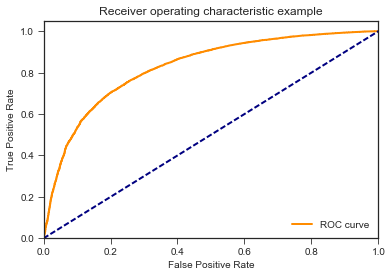

In [12]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(medical["UCURNINS"], probs)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### SVM - przygotowanie
Przygotujmy nasz zbiór danych do pracy nad SVM. Zakodujemy zmienne tak aby były łatwo obsługiwane przez sklearn, który nie rekoduje automatycznie zmiennych nominalnych na liczbowe.

In [6]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

import gc

['Yes' 'No']
[1 0]


Skorzystamy z funkcji get_dummies, zaznaczając opcję drop_first aby nie mieć kolumn dla poziomów bazowych w zmiennych dyskretnych.

In [7]:
medical = pd.read_pickle("datasets/medical.p")
print(medical.UCURNINS.unique())
medical["UCURNINS"] = (medical.UCURNINS=="Yes").astype(int)
print(medical.UCURNINS.unique())
features = ["UMARSTAT", "USATMED", "URELATE", "REGION", "FHOSP", "FDENT", "FEMER", "FDOCT", "UIMMSTAT", "UAGE", "U_FTPT", "U_WKSLY", "U_USHRS", "HOTHVAL", "HRETVAL", "HSSVAL", "HWSVAL", "UBRACE", "UEDUC3", "GENDER"]
levCols = []
numCols = []
for col in features:
    if medical[col].dtype==object:
        levCols.append(col)
    else:
        numCols.append(col)

# Binaryzacja zmiennych nominalnych
dummLev = pd.get_dummies(medical[levCols], drop_first=True)
dummLev.shape
medical2 = pd.concat([medical[numCols], dummLev], axis=1)

Znormalizujemy zmienne

In [8]:
medical2[numCols] = medical2[numCols].apply(lambda x: (x-x.mean())/x.std())
features = medical2.columns.tolist()

['UMARSTAT', 'REGION', 'FHOSP', 'UIMMSTAT', 'U_FTPT', 'UBRACE', 'GENDER']

Niestety nasz zbiór medyczny jest bardzo duży. Będzie bardzo trudno o szybkei rezultaty kiedy wykorzystamy więcej niż 1000-2000 obserwacji. Trudno wykorzystać pełnie potencjału tego algoytmu w tym przypadku. Skłania nas to więc do:
* Ograniczenia liczby zmiennych - wybranie najważniejszych aby zmniejszyć problem nadmierngo dopasowania. Poza kernelem wielomianowym ograniczanie liczby zmiennych nie przyniesie jednak dużego przyspieszenia.
* Wykonanie wielu estymacji na podpróbkach i uśrednienie wyników (ensamble)

**UWAGA!** Zauważmy, że dokonujemy predykcji zarówno dla zbioru treningowego jak i całego zbioru (którego częścią jest zbiór treningowy). NIE jest to poprawnie zastosowana procedura walidacji krzyżowej. Stosujemy uproszczoną procedurę wyłącznie na potrzeby czytelności.

In [9]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVC

(35072, 18)

Sprawdźmy jak wygląda wynik dla SVM z liniowym kernelem.

In [10]:
limit = 2000
kf = KFold(n_splits=5)
aucs = []
aucsT = []
clf = SVC(C=1, cache_size=500, kernel='linear',
    max_iter=-1, probability=True,
    tol=0.001, verbose=False)

for train, test in kf.split(medical2.index.values):
    X = medical2.iloc[train].sample(limit)
    clf.fit(X[features].values, medical.iloc[X.index.values]["UCURNINS"].values)
    prob = clf.predict_proba(medical2.iloc[test][features].values)
    aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))
    
    prob = clf.predict_proba(X[features].values)
    aucsT.append(metrics.roc_auc_score(medical.iloc[X.index.values]["UCURNINS"].values, prob[:,1]))
print(np.mean(aucsT))
print(aucsT)
print(np.mean(aucs))
print(aucs)


Wielomianowym stopnia 2 ...

In [11]:
limit = 2000
kf = KFold(n_splits=5)
aucs = []
aucsT = []
clf = SVC(C=1, cache_size=500, degree=2,kernel='poly',
    max_iter=-1, probability=True,
    tol=0.001, verbose=False)

for train, test in kf.split(medical2.index.values):
    X = medical2.iloc[train].sample(limit)
    clf.fit(X[features].values, medical.iloc[X.index.values]["UCURNINS"].values)
    prob = clf.predict_proba(medical2.iloc[test][features].values)
    aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))
    
    prob = clf.predict_proba(X[features].values)
    aucsT.append(metrics.roc_auc_score(medical.iloc[X.index.values]["UCURNINS"].values, prob[:,1]))
print(np.mean(aucsT))
print(aucsT)
print(np.mean(aucs))
print(aucs)


... i kernelem RBF.

In [12]:
limit = 2000
kf = KFold(n_splits=5)
aucs = []
aucsT = []
clf = SVC(C=1, cache_size=500, kernel='rbf',
    max_iter=-1, probability=True,
    tol=0.001, verbose=False)

for train, test in kf.split(medical2.index.values):
    X = medical2.iloc[train].sample(limit)
    clf.fit(X[features].values, medical.iloc[X.index.values]["UCURNINS"].values)
    prob = clf.predict_proba(medical2.iloc[test][features].values)
    aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))
    
    prob = clf.predict_proba(X[features].values)
    aucsT.append(metrics.roc_auc_score(medical.iloc[X.index.values]["UCURNINS"].values, prob[:,1]))
print(np.mean(aucsT))
print(aucsT)
print(np.mean(aucs))
print(aucs)


(35072, 2)
(2000, 2)


Na koniec sprawdźmy wpływ wielkości parametru C na nasze ozacowanie.

In [13]:
for c in [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]:
    print(c)
    limit = 2000
    kf = KFold(n_splits=5)
    aucs = []
    aucsT = []
    clf = SVC(C=c, cache_size=500, kernel='rbf',
        max_iter=-1, probability=True,
        tol=0.01, verbose=False)

    for train, test in kf.split(medical2.index.values):
        X = medical2.iloc[train].sample(limit)
        clf.fit(X[features].values, medical.iloc[X.index.values]["UCURNINS"].values)
        prob = clf.predict_proba(medical2.iloc[test][features].values)
        aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))

        prob = clf.predict_proba(X[features].values)
        aucsT.append(metrics.roc_auc_score(medical.iloc[X.index.values]["UCURNINS"].values, prob[:,1]))
    print(np.mean(aucsT))
    print(aucsT)
    print(np.mean(aucs))
    print(aucs)


Sprawdźmy jak spisze się SVM na mniejszym zbiorze danych. Poniżej dane dotyczace danych kredytowych. Należy przewidzieć dobre i złe kredyty. 

Wykonaj następujące polecenia:
* Korzystając z walidacji krzyżowej przygotuj najlepszy algorytm z wykorzystaniem SVM. Wybierz odpowiedni kernel (RBF/Polynominal/Linear) i odpowiednie hiperparametry (przede wszystkm C).
    * Zastanów się jak skonstruować  walidację krzyżową. Porownaj rezultaty prostej walidacji krzyżowej z składaną walidacją.
    * Pamiętaj o możliwościach uśredniania wielu algorytmów
    * Przygotuj wyniki regresji logistycznej korzystającej z wszystkich zmiennych
    * Porównaj wyniki dzialania algorytmów.
    

In [ ]:
german = pd.read_csv('datasets/german1.csv', delimiter=',', low_memory=False)
german["target"]=german["target"]-1
german.head()
features = german.columns.tolist()
print(features)
features.remove('target')

## Appendix

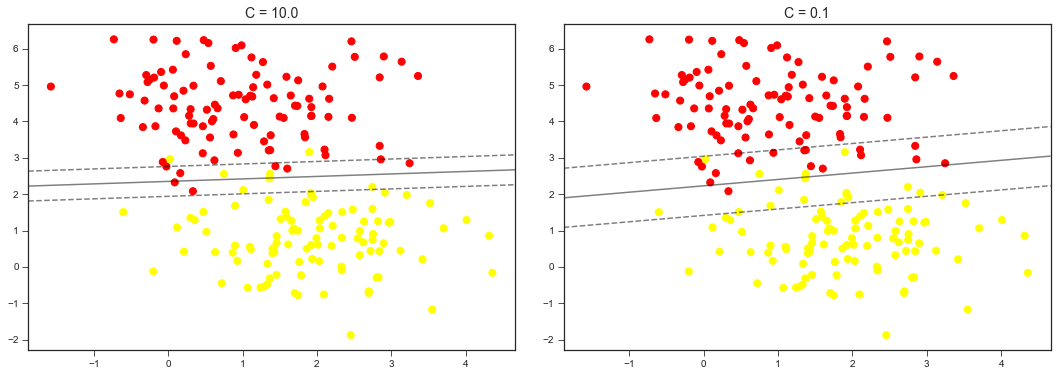

In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline
# Example from: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


X, y = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)